In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data.csv', low_memory=False)
data.head()

,report_date,location,location_type,data_field,data_field_code,time_period,time_period_type,value,unit
0,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_local_cases,AR0001,NaN,NaN,0,cases
1,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_local_cases,AR0002,NaN,NaN,0,cases
2,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_imported_cases,AR0003,NaN,NaN,2,cases
3,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_imported_cases,AR0004,NaN,NaN,1,cases
4,2016-03-19,Argentina-Buenos_Aires,province,cumulative_cases_under_study,AR0005,NaN,NaN,127,cases


In [3]:
data['value'] = pd.to_numeric(data['value'], errors='coerce')
data.value.fillna(0, inplace = True)

In [7]:
plt.style.use('bmh')

# Solutions

## 1. Show data field code 'AR0005' values for 'Argentina-Catamarca' for entire duration

In [8]:
data1 = data[(data.location == 'Argentina-Catamarca') & (data.data_field_code == 'AR0005')].loc[:, ['report_date', 'value']].reset_index(drop = True)
data1.set_index('report_date', inplace=True)
data1.head()

,value
report_date,
2016-03-19,14.0
2016-03-26,15.0
2016-04-02,15.0
2016-04-09,15.0
2016-04-16,15.0


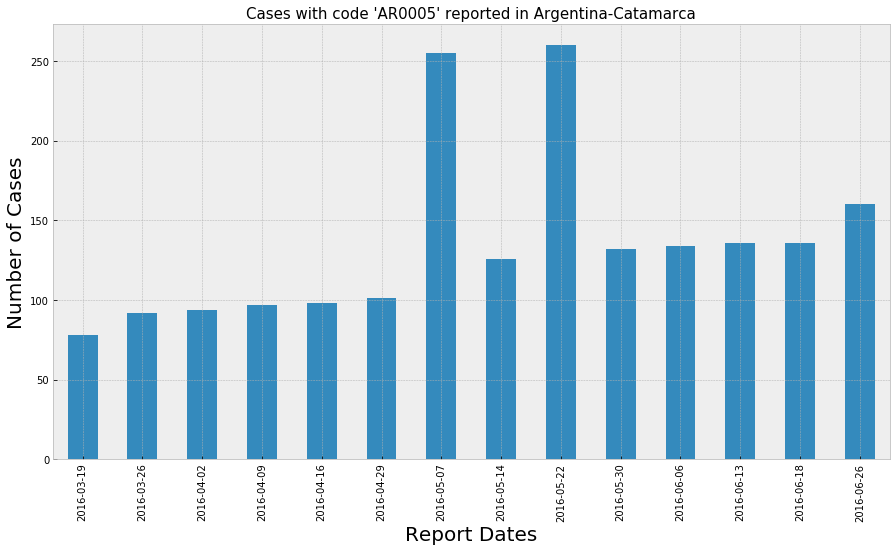

In [23]:
data1.plot(kind = 'bar', figsize=(15, 8), legend=False)
plt.title("Cases with code 'AR0005' reported in Argentina-Catamarca", fontsize = 15)
plt.xlabel('Report Dates', fontsize = 20)
plt.ylabel('Number of Cases', fontsize = 20)
plt.show()

## 2. Plot 'Argentina-CABA' and 'Argentina-Catamarca' for number of cases values for entire duration to identify the difference.


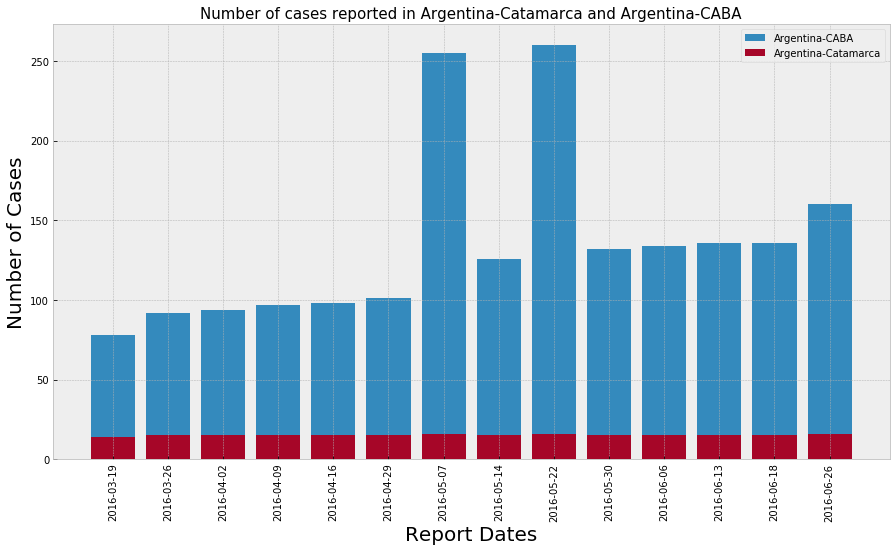

In [50]:
data1 = data[(data.location == 'Argentina-CABA') & (data.unit == 'cases')].groupby('report_date')['value'].sum()
data2 = data[(data.location == 'Argentina-Catamarca') & (data.unit == 'cases')].groupby('report_date')['value'].sum()
plt.figure(figsize=(15,8))
plt.bar(data1.index, data1, label='Argentina-CABA')
plt.bar(data2.index, data2, label='Argentina-Catamarca')
plt.xticks(rotation = 90)
plt.legend()
plt.xlabel('Report Dates', fontsize = 20)
plt.ylabel('Number of Cases', fontsize = 20)
plt.title("Number of cases reported in Argentina-Catamarca and Argentina-CABA", fontsize = 15)
plt.show()

## 3. Plot how data field values are distributed across the locations 'Argentina-Buenos_Aires', 'Argentina-CABA', 'Argentina-Catamarca'

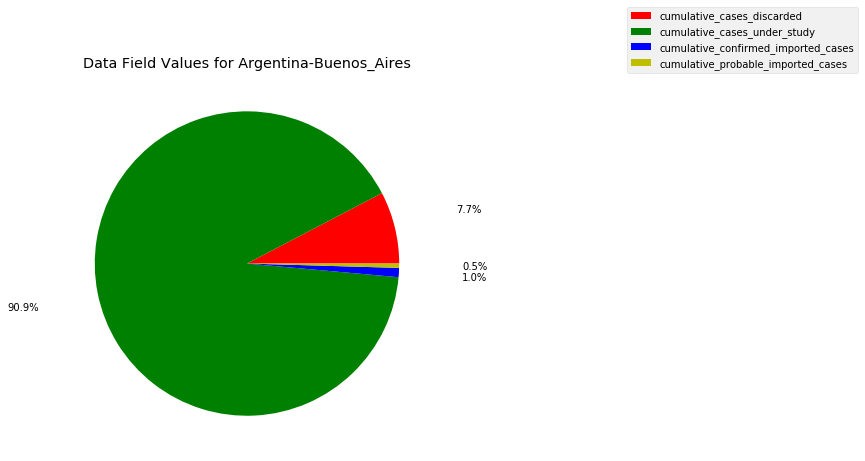

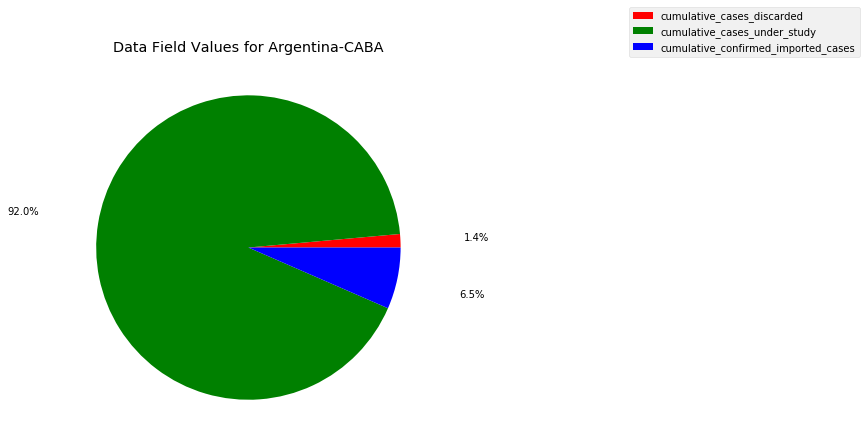

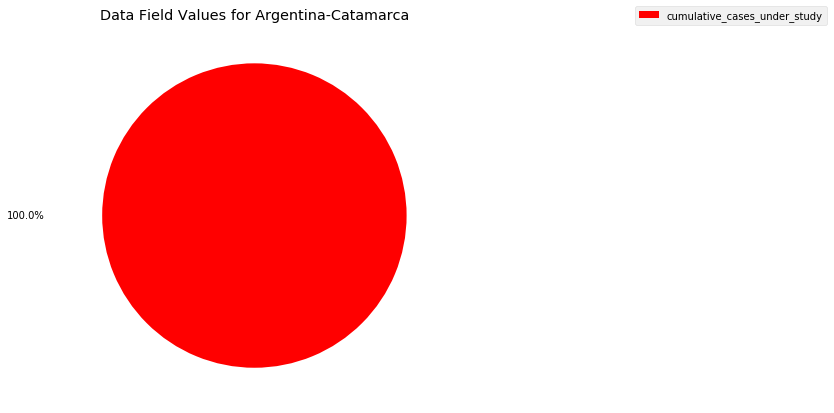

In [47]:
lst = ['Argentina-Buenos_Aires', 'Argentina-CABA', 'Argentina-Catamarca']
colors = ['r', 'g', 'b', 'y']
for i in lst:
    plt.figure(figsize=(7,7))  
    data1 = data[(data.location == i)].groupby('data_field').sum()
    data1 = data1[data1.value > 0]
    plt.pie(x = data1.value, autopct="%1.1f%%", pctdistance= 1.5, colors = colors[:data1.shape[0]])
    plt.title("Data Field Values for {}".format(i))
    plt.legend(loc=(1.5,1), labels=data1.index)
    plt.show()